## Test plots and colours

* Dark teal: #1f6f6f
* Light teal: #9fc8c8
* Dark red: #a00000
* Light red: #d8a6a6
* Dark purple: #57039c
* Light purpe: #d1adef
* Gold: #ccae3f
* dark blue: #082a54
* light blue: #5689c8

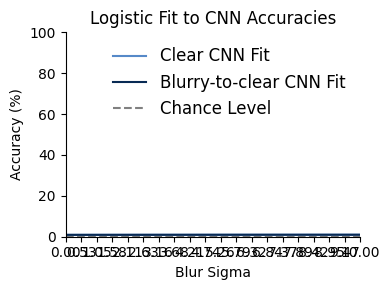

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define a logistic function.
def logistic(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

# Generate synthetic x-axis values for blur_sigmas.
blur_sigmas = np.linspace(0, 10, 20)

# Set a random seed for reproducibility.
np.random.seed(42)

# Generate synthetic accuracies for the "Clear CNN".
# Here, we assume chance ~1/12 (~0.083) and maximum near 1.
true_params_clear = [0.083, 5, 1, 0.917]  # [L, x0, k, b]
clear_model_accuracies = logistic(blur_sigmas, *true_params_clear) + np.random.normal(0, 0.02, blur_sigmas.shape)
clear_model_errors = 0.02 * np.ones_like(blur_sigmas)

# Generate synthetic accuracies for the "Blurry-to-clear CNN" with slightly different parameters.
true_params_blur = [0.083, 5, 0.8, 0.9]
blur_model_accuracies = logistic(blur_sigmas, *true_params_blur) + np.random.normal(0, 0.02, blur_sigmas.shape)
blur_model_errors = 0.02 * np.ones_like(blur_sigmas)

# Fit the logistic function to each dataset.
p0 = [min(clear_model_accuracies), 0, np.median(blur_sigmas), 1]
popt1, _ = curve_fit(logistic, blur_sigmas, clear_model_accuracies,
                     sigma=clear_model_errors, absolute_sigma=True, p0=p0)
p0 = [min(blur_model_accuracies), 0, np.median(blur_sigmas), 1]
popt2, _ = curve_fit(logistic, blur_sigmas, blur_model_accuracies,
                     sigma=blur_model_errors, absolute_sigma=True, p0=p0)

# Generate a smooth x-axis for plotting the fitted curves.
x_fit = np.linspace(blur_sigmas.min(), blur_sigmas.max(), 200)
y_fit1 = logistic(x_fit, *popt1)
y_fit2 = logistic(x_fit, *popt2)

# Create the plot.
fig, ax = plt.subplots(figsize=(4, 3))

# Plot the fitted logistic curves.
ax.plot(x_fit, y_fit1, color='#5689c8', label="Clear CNN Fit")
ax.plot(x_fit, y_fit2, color='#082a54', label="Blurry-to-clear CNN Fit")
ax.axhline(y=1/12, linestyle='--', color='gray', label='Chance Level')

# Add labels and title.
ax.set_xlabel("Blur Sigma")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Logistic Fit to CNN Accuracies")

ax.set_xticks(blur_sigmas)
ax.set_ylim([0, 100])
ax.set_xlim([min(x_fit), max(x_fit)])
ax.legend(frameon=False, fontsize=12)

# Remove top and right spines to leave only x and y axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Run models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/ug-project/src")
!pwd
%load_ext autoreload
%autoreload 2

/content/drive/MyDrive/ug-project/src


In [ ]:
!pip install kornia

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


### Define levels of blur for test set

In [ ]:
blur_sigmas = list(range(33))

weights = [
    [1 if i == j else 0 for j in range(33)]
    for i in range(33)
]

# Toybox-12

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms.v2 as v2
import torch.utils.data as torchdata
from torch.utils.data import DataLoader
from model import AlexNetSup
from utils import convert_checkpoint_keys, add_blur_with
from datasets import ToyboxDataset, TOYBOX_MEAN, TOYBOX_STD

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

#clear_checkpoint_path = "/content/drive/MyDrive/ug-project/output/alexnet/100_epochs/toybox12_clear_100_epochs/model_checkpoint_epoch100.pth"
#blur_checkpoint_path = "/content/drive/MyDrive/ug-project/output/alexnet/100_epochs/toybox12_blurry_to_clear_100_epochs/model_checkpoint_epoch100.pth"
full_blur_checkpoint_path = "/content/drive/MyDrive/ug-project/output/alexnet/full_blur/toybox12_full_blur/model_checkpoint_epoch100.pth"

"""
clear_model = AlexNetSup(num_classes=12).to(device)
checkpoint = torch.load(clear_checkpoint_path, map_location=device)
if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
    state_dict = checkpoint["model_state_dict"]
else:
    state_dict = checkpoint
state_dict = convert_checkpoint_keys(state_dict)
clear_model.load_state_dict(state_dict)

blur_model = AlexNetSup(num_classes=12).to(device)
checkpoint = torch.load(blur_checkpoint_path, map_location=device)
if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
    state_dict = checkpoint["model_state_dict"]
else:
    state_dict = checkpoint
state_dict = convert_checkpoint_keys(state_dict)
blur_model.load_state_dict(state_dict)
"""
full_blur_model = AlexNetSup(num_classes=12).to(device)
checkpoint = torch.load(full_blur_checkpoint_path, map_location=device)
if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
    state_dict = checkpoint["model_state_dict"]
else:
    state_dict = checkpoint
state_dict = convert_checkpoint_keys(state_dict)
full_blur_model.load_state_dict(state_dict)

#clear_model.eval()
#blur_model.eval()
full_blur_model.eval()

rng = np.random.default_rng(seed=5)
batch_size = 256

#clear_model_accuracies = []
#blur_model_accuracies = []
full_blur_model_accuracies = []

transform = v2.Compose([
    v2.ToPILImage(),
    v2.Resize(224),
    v2.ToTensor(),
    v2.Normalize(mean=TOYBOX_MEAN, std=TOYBOX_STD)
])

test_dataset = ToyboxDataset(rng=rng, train=False, hypertune=False, transform=transform, num_images_per_class=150)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True, drop_last=True, persistent_workers=True)

for weight in weights:
    sigma = np.dot(weight, blur_sigmas)

    # Evaluate first model
    #correct_clear = 0
    #correct_blur = 0
    correct_full_blur = 0
    total = 0
    with torch.no_grad():
        for _, images, labels in test_loader:
            images = add_blur_with(images, blur_sigmas, weight)
            images, labels = images.to(device), labels.to(device)
            #predicted_clear = torch.max(clear_model(images), 1)[1]
            #predicted_blur = torch.max(blur_model(images), 1)[1]
            predicted_full_blur = torch.max(full_blur_model(images), 1)[1]
            total += labels.size(0)
            #correct_clear += (predicted_clear == labels).sum().item()
            #correct_blur += (predicted_blur == labels).sum().item()
            correct_full_blur += (predicted_full_blur == labels).sum().item()
    #acc_clear = correct_clear / total
    #acc_blur = correct_blur / total
    acc_full_blur = correct_full_blur / total

    #clear_model_accuracies.append(acc_clear * 100)
    #blur_model_accuracies.append(acc_blur * 100)
    full_blur_model_accuracies.append(acc_full_blur * 100)
    print(f"Sigma={sigma}: Full Blur Model Accuracy = {acc_full_blur*100:.2f}")

    #print(f"Sigma={sigma}: Clear Model Accuracy = {acc_clear*100:.2f}%, Blur Model Accuracy = {acc_blur*100:.2f}%, Full Blur Model Accuracy = {acc_full_blur*100:.2f}")

#toybox12_clear = clear_model_accuracies
#toybox12_blur = blur_model_accuracies
toybox12_full_blur = full_blur_model_accuracies
print(toybox12_full_blur)

Using device: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


Sigma=0: Full Blur Model Accuracy = 39.35
Sigma=1: Full Blur Model Accuracy = 40.13
Sigma=2: Full Blur Model Accuracy = 41.66
Sigma=3: Full Blur Model Accuracy = 44.10
Sigma=4: Full Blur Model Accuracy = 47.03
Sigma=5: Full Blur Model Accuracy = 50.71
Sigma=6: Full Blur Model Accuracy = 53.20
Sigma=7: Full Blur Model Accuracy = 53.52
Sigma=8: Full Blur Model Accuracy = 52.02
Sigma=9: Full Blur Model Accuracy = 49.73
Sigma=10: Full Blur Model Accuracy = 46.28
Sigma=11: Full Blur Model Accuracy = 42.20
Sigma=12: Full Blur Model Accuracy = 37.79
Sigma=13: Full Blur Model Accuracy = 34.28
Sigma=14: Full Blur Model Accuracy = 30.86
Sigma=15: Full Blur Model Accuracy = 27.69
Sigma=16: Full Blur Model Accuracy = 25.02
Sigma=17: Full Blur Model Accuracy = 22.90
Sigma=18: Full Blur Model Accuracy = 21.05
Sigma=19: Full Blur Model Accuracy = 19.81
Sigma=20: Full Blur Model Accuracy = 18.86
Sigma=21: Full Blur Model Accuracy = 17.62
Sigma=22: Full Blur Model Accuracy = 16.54
Sigma=23: Full Blur M

# Toybox-360

In [ ]:
import torch
import torch.nn as nn
from model import AlexNetSup
from utils import convert_checkpoint_keys, add_blur_with
from datasets import ToyboxDatasetInstances, TOYBOX_MEAN, TOYBOX_STD
import numpy as np
import torchvision.transforms.v2 as v2
import torch.utils.data as torchdata
from torch.utils.data import DataLoader

#clear_checkpoint_path = "/content/drive/MyDrive/ug-project/output/alexnet/100_epochs/toybox360_clear_100_epochs/model_checkpoint_epoch100.pth"
#blur_checkpoint_path = "/content/drive/MyDrive/ug-project/output/alexnet/100_epochs/toybox360_blur_100_epochs/model_checkpoint_epoch100.pth"
full_blur_checkpoint_path = "/content/drive/MyDrive/ug-project/output/alexnet/full_blur/toybox360_full_blur/model_checkpoint_epoch100.pth"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

"""
clear_model = AlexNetSup(num_classes=360).to(device)
checkpoint = torch.load(clear_checkpoint_path, map_location=device)
if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
    state_dict = checkpoint["model_state_dict"]
else:
    state_dict = checkpoint
state_dict = convert_checkpoint_keys(state_dict)
clear_model.load_state_dict(state_dict)

blur_model = AlexNetSup(num_classes=360).to(device)
checkpoint = torch.load(blur_checkpoint_path, map_location=device)
if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
    state_dict = checkpoint["model_state_dict"]
else:
    state_dict = checkpoint
state_dict = convert_checkpoint_keys(state_dict)
blur_model.load_state_dict(state_dict)
"""

full_blur_model = AlexNetSup(num_classes=360).to(device)
checkpoint = torch.load(full_blur_checkpoint_path, map_location=device)
if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
    state_dict = checkpoint["model_state_dict"]
else:
    state_dict = checkpoint
state_dict = convert_checkpoint_keys(state_dict)
full_blur_model.load_state_dict(state_dict)

#clear_model.eval()
#blur_model.eval()
full_blur_model.eval()

rng = np.random.default_rng(seed=5)
batch_size = 256

#clear_model_accuracies = []
#blur_model_accuracies = []
full_blur_model_accuracies = []

transform = v2.Compose([
    v2.ToPILImage(),
    v2.Resize(224),
    v2.ToTensor(),
    v2.Normalize(mean=TOYBOX_MEAN, std=TOYBOX_STD)
])

test_dataset = ToyboxDatasetInstances(rng=rng, train=False, hypertune=False, transform=transform, num_images_per_object=150)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True, drop_last=True, persistent_workers=True)

for weight in weights:
    sigma = np.dot(weight, blur_sigmas)

    # Evaluate first model
    #correct_clear = 0
    #correct_blur = 0
    correct_full_blur = 0
    total = 0
    with torch.no_grad():
        for _, images, labels in test_loader:
            images = add_blur_with(images, blur_sigmas, weight)
            images, labels = images.to(device), labels.to(device)
            #predicted_clear = torch.max(clear_model(images), 1)[1]
            #predicted_blur = torch.max(blur_model(images), 1)[1]
            predicted_full_blur = torch.max(full_blur_model(images), 1)[1]
            total += labels.size(0)
            #correct_clear += (predicted_clear == labels).sum().item()
            #correct_blur += (predicted_blur == labels).sum().item()
            correct_full_blur += (predicted_full_blur == labels).sum().item()
    #acc_clear = correct_clear / total
    #acc_blur = correct_blur / total
    acc_full_blur = correct_full_blur / total

    #clear_model_accuracies.append(acc_clear * 100)
    #blur_model_accuracies.append(acc_blur * 100)
    full_blur_model_accuracies.append(acc_full_blur * 100)
    print(f"Sigma={sigma}: Full Blur Model Accuracy = {acc_full_blur*100:.2f}")

    #print(f"Sigma={sigma}: Clear Model Accuracy = {acc_clear*100:.2f}%, Blur Model Accuracy = {acc_blur*100:.2f}%, Full Blur Model Accuracy = {acc_full_blur*100:.2f}")

#toybox360_clear = clear_model_accuracies
#toybox360_blur = blur_model_accuracies
toybox360_full_blur = full_blur_model_accuracies
print(toybox360_full_blur)

Using device: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


Sigma=0: Full Blur Model Accuracy = 8.45
Sigma=1: Full Blur Model Accuracy = 10.33
Sigma=2: Full Blur Model Accuracy = 14.20
Sigma=3: Full Blur Model Accuracy = 25.18
Sigma=4: Full Blur Model Accuracy = 41.02
Sigma=5: Full Blur Model Accuracy = 56.61
Sigma=6: Full Blur Model Accuracy = 69.32
Sigma=7: Full Blur Model Accuracy = 75.21
Sigma=8: Full Blur Model Accuracy = 75.92
Sigma=9: Full Blur Model Accuracy = 72.69
Sigma=10: Full Blur Model Accuracy = 65.91
Sigma=11: Full Blur Model Accuracy = 56.00
Sigma=12: Full Blur Model Accuracy = 46.77
Sigma=13: Full Blur Model Accuracy = 37.64
Sigma=14: Full Blur Model Accuracy = 30.22
Sigma=15: Full Blur Model Accuracy = 24.61
Sigma=16: Full Blur Model Accuracy = 20.56
Sigma=17: Full Blur Model Accuracy = 17.79
Sigma=18: Full Blur Model Accuracy = 15.23
Sigma=19: Full Blur Model Accuracy = 13.60
Sigma=20: Full Blur Model Accuracy = 12.18
Sigma=21: Full Blur Model Accuracy = 11.12
Sigma=22: Full Blur Model Accuracy = 10.12
Sigma=23: Full Blur Mo

# FaceScrub

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms.v2 as v2
import torch.utils.data as torchdata
from torch.utils.data import DataLoader
from model import AlexNetSup
from utils import convert_checkpoint_keys, add_blur_with
from datasets import FaceScrubDataset, FACESCRUB_MEAN, FACESCRUB_STD

#clear_checkpoint_path = "/content/drive/MyDrive/ug-project/output/alexnet/100_epochs/facescrub_clear_100_epochs/model_checkpoint_epoch100.pth"
#blur_checkpoint_path = "/content/drive/MyDrive/ug-project/output/alexnet/100_epochs/facescrub_blur_100_epochs/model_checkpoint_epoch100.pth"
full_blur_checkpoint_path = "/content/drive/MyDrive/ug-project/output/alexnet/full_blur/facescrub_full_blur/model_checkpoint_epoch100.pth"

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

"""
# First model: FaceScrub clear
clear_model = AlexNetSup(num_classes=297).to(device)
checkpoint = torch.load(clear_checkpoint_path, map_location=device)
if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
    state_dict = checkpoint["model_state_dict"]
else:
    state_dict = checkpoint
state_dict = convert_checkpoint_keys(state_dict)
clear_model.load_state_dict(state_dict)

# Second model: FaceScrub blur
blur_model = AlexNetSup(num_classes=297).to(device)
checkpoint = torch.load(blur_checkpoint_path, map_location=device)
if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
    state_dict = checkpoint["model_state_dict"]
else:
    state_dict = checkpoint
state_dict = convert_checkpoint_keys(state_dict)
blur_model.load_state_dict(state_dict)
"""

full_blur_model = AlexNetSup(num_classes=297).to(device)
checkpoint = torch.load(full_blur_checkpoint_path, map_location=device)
if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
    state_dict = checkpoint["model_state_dict"]
else:
    state_dict = checkpoint
state_dict = convert_checkpoint_keys(state_dict)
full_blur_model.load_state_dict(state_dict)

#clear_model.eval()
#blur_model.eval()
full_blur_model.eval()

rng = np.random.default_rng(seed=5)
batch_size = 256

#clear_model_accuracies = []
#blur_model_accuracies = []
full_blur_model_accuracies = []

transform = v2.Compose([
    v2.ToPILImage(),
    v2.Resize(224),
    v2.ToTensor(),
    v2.Normalize(mean=FACESCRUB_MEAN, std=FACESCRUB_STD)
])

test_dataset = FaceScrubDataset(train=False, hypertune=False, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True, drop_last=True, persistent_workers=True)

for weight in weights:
    sigma = np.dot(weight, blur_sigmas)

    # Evaluate first model
    correct_clear = 0
    correct_blur = 0
    correct_full_blur = 0
    total = 0
    with torch.no_grad():
        for _, images, labels in test_loader:
            images = add_blur_with(images, blur_sigmas, weight)
            images, labels = images.to(device), labels.to(device)
            #predicted_clear = torch.max(clear_model(images), 1)[1]
            #predicted_blur = torch.max(blur_model(images), 1)[1]
            predicted_full_blur = torch.max(full_blur_model(images), 1)[1]
            total += labels.size(0)
            #correct_clear += (predicted_clear == labels).sum().item()
            #correct_blur += (predicted_blur == labels).sum().item()
            correct_full_blur += (predicted_full_blur == labels).sum().item()
    #acc_clear = correct_clear / total
    #acc_blur = correct_blur / total
    acc_full_blur = correct_full_blur / total

    #clear_model_accuracies.append(acc_clear * 100)
    #blur_model_accuracies.append(acc_blur * 100)
    full_blur_model_accuracies.append(acc_full_blur * 100)
    print(f"Sigma={sigma}: Full Blur Model Accuracy = {acc_full_blur*100:.2f}")

    #print(f"Sigma={sigma}: Clear Model Accuracy = {acc_clear*100:.2f}%, Blur Model Accuracy = {acc_blur*100:.2f}%, Full Blur Model Accuracy = {acc_full_blur*100:.2f}")

#facescrub_clear = clear_model_accuracies
#facescrub_blur = blur_model_accuracies
facescrub_full_blur = full_blur_model_accuracies
print(facescrub_full_blur)

Using device: cuda
Sigma=0: Full Blur Model Accuracy = 14.70
Sigma=1: Full Blur Model Accuracy = 16.83
Sigma=2: Full Blur Model Accuracy = 22.73
Sigma=3: Full Blur Model Accuracy = 32.88
Sigma=4: Full Blur Model Accuracy = 47.87
Sigma=5: Full Blur Model Accuracy = 62.71
Sigma=6: Full Blur Model Accuracy = 73.01
Sigma=7: Full Blur Model Accuracy = 77.95
Sigma=8: Full Blur Model Accuracy = 77.95
Sigma=9: Full Blur Model Accuracy = 72.73
Sigma=10: Full Blur Model Accuracy = 61.86
Sigma=11: Full Blur Model Accuracy = 47.66
Sigma=12: Full Blur Model Accuracy = 35.33
Sigma=13: Full Blur Model Accuracy = 25.36
Sigma=14: Full Blur Model Accuracy = 19.03
Sigma=15: Full Blur Model Accuracy = 14.99
Sigma=16: Full Blur Model Accuracy = 11.51
Sigma=17: Full Blur Model Accuracy = 9.45
Sigma=18: Full Blur Model Accuracy = 7.60
Sigma=19: Full Blur Model Accuracy = 6.39
Sigma=20: Full Blur Model Accuracy = 5.18
Sigma=21: Full Blur Model Accuracy = 4.30
Sigma=22: Full Blur Model Accuracy = 3.52
Sigma=23

# ImageNet-12

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms.v2 as v2
import torch.utils.data as torchdata
from torch.utils.data import DataLoader
from model import AlexNetSup
from utils import convert_checkpoint_keys, add_blur_with
from datasets import DatasetIN12, IN12_MEAN, IN12_STD

#clear_checkpoint_path = "/content/drive/MyDrive/ug-project/output/alexnet/100_epochs/IN12_clear_100_epochs/model_checkpoint_epoch100.pth"
#blur_checkpoint_path = "/content/drive/MyDrive/ug-project/output/alexnet/100_epochs/IN12_blurry_to_clear_100_epochs/model_checkpoint_epoch100.pth"
full_blur_checkpoint_path = "/content/drive/MyDrive/ug-project/output/alexnet/full_blur/IN12_full_blur/model_checkpoint_epoch100.pth"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
"""
clear_model = AlexNetSup(num_classes=12).to(device)
checkpoint = torch.load(clear_checkpoint_path, map_location=device)
if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
    state_dict = checkpoint["model_state_dict"]
else:
    state_dict = checkpoint
state_dict = convert_checkpoint_keys(state_dict)
clear_model.load_state_dict(state_dict)

blur_model = AlexNetSup(num_classes=12).to(device)
checkpoint = torch.load(blur_checkpoint_path, map_location=device)
if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
    state_dict = checkpoint["model_state_dict"]
else:
    state_dict = checkpoint
state_dict = convert_checkpoint_keys(state_dict)
blur_model.load_state_dict(state_dict)
"""
full_blur_model = AlexNetSup(num_classes=12).to(device)
checkpoint = torch.load(full_blur_checkpoint_path, map_location=device)
if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
    state_dict = checkpoint["model_state_dict"]
else:
    state_dict = checkpoint
state_dict = convert_checkpoint_keys(state_dict)
full_blur_model.load_state_dict(state_dict)

#clear_model.eval()
#blur_model.eval()
full_blur_model.eval()

rng = np.random.default_rng(seed=5)
batch_size = 256

#clear_model_accuracies = []
#blur_model_accuracies = []
full_blur_model_accuracies = []

transform = v2.Compose([
    v2.ToPILImage(),
    v2.Resize(224),
    v2.ToTensor(),
    v2.Normalize(mean=IN12_MEAN, std=IN12_STD)
])

test_dataset = DatasetIN12(train=False, hypertune=False, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True, drop_last=True, persistent_workers=True)

for weight in weights:
    sigma = np.dot(weight, blur_sigmas)

    # Evaluate first model
    #correct_clear = 0
    #correct_blur = 0
    correct_full_blur = 0
    total = 0
    with torch.no_grad():
        for _, images, labels in test_loader:
            images = add_blur_with(images, blur_sigmas, weight)
            images, labels = images.to(device), labels.to(device)
            #predicted_clear = torch.max(clear_model(images), 1)[1]
            #predicted_blur = torch.max(blur_model(images), 1)[1]
            predicted_full_blur = torch.max(full_blur_model(images), 1)[1]
            total += labels.size(0)
            #correct_clear += (predicted_clear == labels).sum().item()
            #correct_blur += (predicted_blur == labels).sum().item()
            correct_full_blur += (predicted_full_blur == labels).sum().item()
    #acc_clear = correct_clear / total
    #acc_blur = correct_blur / total
    acc_full_blur = correct_full_blur / total

    #clear_model_accuracies.append(acc_clear * 100)
    #blur_model_accuracies.append(acc_blur * 100)
    full_blur_model_accuracies.append(acc_full_blur * 100)
    print(f"Sigma={sigma}: Full Blur Model Accuracy = {acc_full_blur*100:.2f}")

    #print(f"Sigma={sigma}: Clear Model Accuracy = {acc_clear*100:.2f}%, Blur Model Accuracy = {acc_blur*100:.2f}%, Full Blur Model Accuracy = {acc_full_blur*100:.2f}")

#IN12_clear = clear_model_accuracies
#IN12_blur = blur_model_accuracies
IN12_full_blur = full_blur_model_accuracies
print(IN12_full_blur)

Using device: cuda
Sigma=0: Full Blur Model Accuracy = 43.65
Sigma=1: Full Blur Model Accuracy = 44.43
Sigma=2: Full Blur Model Accuracy = 47.85
Sigma=3: Full Blur Model Accuracy = 49.90
Sigma=4: Full Blur Model Accuracy = 53.42
Sigma=5: Full Blur Model Accuracy = 55.96
Sigma=6: Full Blur Model Accuracy = 60.45
Sigma=7: Full Blur Model Accuracy = 60.35
Sigma=8: Full Blur Model Accuracy = 59.86
Sigma=9: Full Blur Model Accuracy = 59.77
Sigma=10: Full Blur Model Accuracy = 58.50
Sigma=11: Full Blur Model Accuracy = 53.42
Sigma=12: Full Blur Model Accuracy = 48.14
Sigma=13: Full Blur Model Accuracy = 41.60
Sigma=14: Full Blur Model Accuracy = 37.11
Sigma=15: Full Blur Model Accuracy = 33.01
Sigma=16: Full Blur Model Accuracy = 28.32
Sigma=17: Full Blur Model Accuracy = 25.10
Sigma=18: Full Blur Model Accuracy = 23.73
Sigma=19: Full Blur Model Accuracy = 22.17
Sigma=20: Full Blur Model Accuracy = 20.80
Sigma=21: Full Blur Model Accuracy = 20.12
Sigma=22: Full Blur Model Accuracy = 20.12
Si

# ImageNet-100

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms.v2 as v2
import torch.utils.data as torchdata
from torch.utils.data import DataLoader
from model import AlexNetSup
from utils import convert_checkpoint_keys, add_blur_with
from datasets import DatasetIN100, IN_MEAN, IN_STD

clear_checkpoint_path = "/content/drive/MyDrive/ug-project/output/alexnet/100_epochs/IN100_clear/model_checkpoint_epoch100.pth"
blur_checkpoint_path = "/content/drive/MyDrive/ug-project/output/alexnet/100_epochs/IN100_blur/model_checkpoint_epoch100.pth"
full_blur_checkpoint_path = "/content/drive/MyDrive/ug-project/output/alexnet/full_blur/IN100_full_blur/model_checkpoint_epoch100.pth"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

clear_model = AlexNetSup(num_classes=100).to(device)
checkpoint = torch.load(clear_checkpoint_path, map_location=device)
if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
    state_dict = checkpoint["model_state_dict"]
else:
    state_dict = checkpoint
state_dict = convert_checkpoint_keys(state_dict)
clear_model.load_state_dict(state_dict)

blur_model = AlexNetSup(num_classes=100).to(device)
checkpoint = torch.load(blur_checkpoint_path, map_location=device)
if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
    state_dict = checkpoint["model_state_dict"]
else:
    state_dict = checkpoint
state_dict = convert_checkpoint_keys(state_dict)
blur_model.load_state_dict(state_dict)

full_blur_model = AlexNetSup(num_classes=100).to(device)
checkpoint = torch.load(full_blur_checkpoint_path, map_location=device)
if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
    state_dict = checkpoint["model_state_dict"]
else:
    state_dict = checkpoint
state_dict = convert_checkpoint_keys(state_dict)
full_blur_model.load_state_dict(state_dict)

clear_model.eval()
blur_model.eval()
full_blur_model.eval()

rng = np.random.default_rng(seed=5)
batch_size = 256

clear_model_accuracies = []
blur_model_accuracies = []
full_blur_model_accuracies = []

transform = v2.Compose([
    v2.ToPILImage(),
    v2.Resize((224, 224)),
    v2.ToTensor(),
    v2.Normalize(mean=IN_MEAN, std=IN_STD)
])

test_dataset = DatasetIN100(train=False, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True, drop_last=True, persistent_workers=True)

for weight in weights:
    sigma = np.dot(weight, blur_sigmas)

    # Evaluate first model
    correct_clear = 0
    correct_blur = 0
    correct_full_blur = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = add_blur_with(images, blur_sigmas, weight)
            images, labels = images.to(device), labels.to(device)
            predicted_clear = torch.max(clear_model(images), 1)[1]
            predicted_blur = torch.max(blur_model(images), 1)[1]
            predicted_full_blur = torch.max(full_blur_model(images), 1)[1]
            total += labels.size(0)
            correct_clear += (predicted_clear == labels).sum().item()
            correct_blur += (predicted_blur == labels).sum().item()
            correct_full_blur += (predicted_full_blur == labels).sum().item()
    acc_clear = correct_clear / total
    acc_blur = correct_blur / total
    acc_full_blur = correct_full_blur / total

    clear_model_accuracies.append(acc_clear * 100)
    blur_model_accuracies.append(acc_blur * 100)
    full_blur_model_accuracies.append(acc_full_blur * 100)

    print(f"Sigma={sigma}: Clear Model Accuracy = {acc_clear*100:.2f}%, Blur Model Accuracy = {acc_blur*100:.2f}%, Full Blur Model Accuracy = {acc_full_blur*100:.2f}")

IN100_clear = clear_model_accuracies
IN100_blur = blur_model_accuracies
IN100_full_blur = full_blur_model_accuracies
print(IN100_clear)
print(IN100_blur)
print(IN100_full_blur)

Using device: cuda
Sigma=0: Clear Model Accuracy = 64.60%, Blur Model Accuracy = 53.78%, Full Blur Model Accuracy = 7.07
Sigma=1: Clear Model Accuracy = 53.02%, Blur Model Accuracy = 52.04%, Full Blur Model Accuracy = 7.89
Sigma=2: Clear Model Accuracy = 28.12%, Blur Model Accuracy = 40.48%, Full Blur Model Accuracy = 10.83
Sigma=3: Clear Model Accuracy = 13.90%, Blur Model Accuracy = 22.25%, Full Blur Model Accuracy = 15.73
Sigma=4: Clear Model Accuracy = 9.15%, Blur Model Accuracy = 12.77%, Full Blur Model Accuracy = 23.58
Sigma=5: Clear Model Accuracy = 7.01%, Blur Model Accuracy = 9.07%, Full Blur Model Accuracy = 32.96
Sigma=6: Clear Model Accuracy = 6.50%, Blur Model Accuracy = 7.57%, Full Blur Model Accuracy = 41.57
Sigma=7: Clear Model Accuracy = 5.98%, Blur Model Accuracy = 6.56%, Full Blur Model Accuracy = 47.39
Sigma=8: Clear Model Accuracy = 5.55%, Blur Model Accuracy = 6.09%, Full Blur Model Accuracy = 49.40
Sigma=9: Clear Model Accuracy = 5.28%, Blur Model Accuracy = 5.69

# Results

In [2]:
import numpy as np

blur_sigmas = np.array(list(range(33)))
chance_levels = [100 * (1/297), 100 * (1/360), 100 * (1/12), 100 * (1/12), 100 * (1/100)]
datasets = ["Faces", "Toybox (instance-level)", "Toybox (category-level)", "ImageNet-12", "ImageNet-100"]

# not using these colors for this plot
colors = [
    ("#d1adef", "#57039c"),  # FaceScrub
    ("#9fc8c8", "#1f6f6f"),  # Toybox-360
    ("#d8a6a6", "#a00000"),  # Toybox-12
    ("#5689c8", "#082a54"),  # ImageNet-12
    ("#f5d76e", "#a67300")   # IN-100
]

# Toybox-12
toybox12_clear = np.array([
    62.27, 61.96, 54.34, 42.44, 33.68, 27.70, 25.46, 24.17, 23.52,
    23.48, 23.57, 23.45, 23.26, 22.68, 21.78, 21.20, 20.40, 19.47,
    18.50, 17.67, 17.09, 16.42, 15.95, 15.62, 15.48, 15.59, 15.53,
    15.45, 15.56, 15.70, 15.72, 15.88, 15.99
])
toybox12_blur = np.array([
    56.80, 55.42, 52.85, 47.97, 41.11, 35.61, 31.94, 29.70, 28.09,
    26.98, 25.71, 24.77, 23.76, 22.84, 21.91, 20.75, 19.90, 19.31,
    18.70, 18.25, 17.60, 17.07, 16.60, 16.35, 16.09, 15.84, 15.56,
    15.05, 14.93, 14.80, 14.62, 14.54, 14.38
])
toybox12_full_blur = np.array([39.347956730769226, 40.129206730769226, 41.66165865384615, 44.10306490384615, 47.02524038461539, 50.706129807692314, 53.200120192307686, 53.523137019230774, 52.02073317307693, 49.72956730769231, 46.281550480769226, 42.195012019230774, 37.785456730769226, 34.284855769230774, 30.859375, 27.689302884615387, 25.015024038461537, 22.904146634615387, 21.048677884615387, 19.80919471153846, 18.86268028846154, 17.623197115384613, 16.541466346153847, 15.797776442307693, 15.091646634615385, 14.475661057692307, 13.844651442307693, 13.469050480769232, 13.303786057692307, 13.093449519230768, 13.025841346153847, 12.883112980769232, 12.815504807692307])

# Toybox-360
toybox360_clear = np.array([
    86.29, 84.34, 68.96, 45.31, 31.32, 23.47, 19.46, 16.48, 14.42,
    12.89, 11.58, 10.26, 9.55, 8.74, 8.06, 7.42, 6.57, 6.25, 5.93,
    5.36, 5.01, 4.76, 4.55, 4.37, 4.15, 3.87, 3.59, 3.55, 3.37,
    3.27, 3.16, 2.98, 2.84
])
toybox360_blur = np.array([
    86.04, 85.58, 83.77, 78.55, 69.53, 60.26, 51.60, 44.67, 38.35,
    33.66, 29.62, 26.38, 23.76, 21.59, 19.25, 17.33, 15.48, 13.78,
    12.29, 11.01, 9.94, 9.16, 8.52, 7.46, 7.07, 6.61, 6.14, 5.75,
    5.40, 5.33, 4.94, 4.58, 4.44
])
toybox360_full_blur = np.array([8.451704545454545, 10.333806818181818, 14.204545454545455, 25.177556818181817, 41.015625, 56.60511363636363, 69.31818181818183, 75.21306818181817, 75.92329545454545, 72.69176136363636, 65.9090909090909, 56.00142045454546, 46.768465909090914, 37.64204545454545, 30.220170454545453, 24.609375, 20.561079545454543, 17.791193181818183, 15.234375, 13.600852272727273, 12.180397727272728, 11.115056818181818, 10.120738636363637, 9.197443181818182, 8.238636363636363, 7.776988636363637, 7.421875, 6.924715909090909, 6.3210227272727275, 6.001420454545454, 5.646306818181818, 5.255681818181818, 5.0071022727272725]
)

# faces
facescrub_clear = np.array([
    88.78, 87.78, 85.19, 76.81, 57.56, 35.44, 20.35, 11.90, 7.60,
    4.97, 4.23, 3.05, 2.52, 2.31, 2.06, 1.81, 1.63, 1.56, 1.42,
    1.31, 1.17, 1.24, 1.14, 1.14, 1.07, 1.07, 1.03, 1.10, 0.89,
    1.03, 0.82, 0.71, 0.67
])
facescrub_blur = np.array([
    84.59, 84.55, 83.88, 82.03, 77.70, 70.10, 59.91, 49.43, 38.00,
    29.19, 21.52, 16.16, 12.43, 9.77, 7.56, 6.25, 5.68, 4.90, 4.23,
    4.08, 3.69, 3.44, 3.27, 3.02, 2.59, 2.38, 2.31, 1.88, 1.78,
    1.46, 1.53, 1.42, 1.42
])
facescrub_full_blur = np.array([14.701704545454545, 16.832386363636363, 22.727272727272727, 32.88352272727273, 47.86931818181818, 62.71306818181818, 73.01136363636364, 77.94744318181817, 77.94744318181817, 72.72727272727273, 61.86079545454546, 47.65625, 35.33380681818182, 25.355113636363637, 19.03409090909091, 14.985795454545455, 11.505681818181818, 9.446022727272728, 7.5994318181818175, 6.392045454545454, 5.184659090909091, 4.296875, 3.515625, 3.018465909090909, 2.4857954545454546, 2.130681818181818, 1.6690340909090908, 1.4914772727272727, 1.3849431818181819, 1.3494318181818181, 1.455965909090909, 1.3849431818181819, 1.3849431818181819])

# Imagenet-12
IN12_clear = np.array([
    75.39, 74.12, 65.53, 50.88, 38.28, 30.47, 25.68, 21.39, 19.53,
    19.43, 18.46, 18.36, 17.87, 17.68, 17.38, 16.99, 16.50, 15.72,
    15.33, 14.65, 14.45, 13.67, 13.67, 13.48, 13.57, 13.38, 13.38,
    13.28, 13.18, 12.99, 12.50, 12.40, 12.50
])
IN12_blur = np.array([
    72.27, 71.58, 68.36, 63.28, 56.64, 49.32, 42.77, 38.09, 33.40,
    29.00, 26.76, 24.61, 22.75, 22.56, 21.68, 21.19, 20.90, 20.90,
    20.70, 20.02, 19.24, 18.55, 18.26, 17.97, 17.68, 17.19, 16.50,
    15.62, 15.53, 15.72, 15.53, 15.72, 15.72
])
IN12_full_blur = np.array([43.65234375, 44.43359375, 47.8515625, 49.90234375, 53.41796875, 55.95703125, 60.44921875, 60.3515625, 59.86328125, 59.765625, 58.49609375, 53.41796875, 48.14453125, 41.6015625, 37.109375, 33.0078125, 28.3203125, 25.09765625, 23.73046875, 22.16796875, 20.80078125, 20.1171875, 20.1171875, 19.53125, 19.140625, 18.75, 18.65234375, 18.9453125, 18.9453125, 18.75, 19.04296875, 19.04296875, 18.75])

# Imagenet-100
IN100_clear = [64.59703947368422, 53.02220394736842, 28.125, 13.898026315789474, 9.148848684210527, 7.010690789473683, 6.496710526315789, 5.982730263157895, 5.550986842105264, 5.283717105263158, 5.283717105263158, 5.037006578947369, 4.666940789473684, 4.296875, 4.214638157894736, 4.173519736842105, 4.009046052631579, 3.8856907894736845, 3.8240131578947367, 3.7212171052631584, 3.5978618421052633, 3.5567434210526314, 3.6389802631578947, 3.5567434210526314, 3.453947368421053, 3.4333881578947367, 3.515625, 3.5361842105263155, 3.4745065789473686, 3.515625, 3.5361842105263155, 3.5361842105263155, 3.4745065789473686]
IN100_blur = [53.7828947368421, 52.03536184210527, 40.48108552631579, 22.245065789473685, 12.767269736842104, 9.066611842105262, 7.565789473684211, 6.558388157894737, 6.0855263157894735, 5.6949013157894735, 5.283717105263158, 4.810855263157895, 4.625822368421053, 4.440789473684211, 4.276315789473684, 4.111842105263158, 4.050164473684211, 3.9268092105263155, 3.803453947368421, 3.618421052631579, 3.5978618421052633, 3.5567434210526314, 3.453947368421053, 3.4333881578947367, 3.4745065789473686, 3.4745065789473686, 3.4950657894736845, 3.4333881578947367, 3.3922697368421053, 3.3717105263157894, 3.4333881578947367, 3.4333881578947367, 3.4333881578947367]
IN100_full_blur = [7.072368421052631, 7.894736842105263, 10.834703947368421, 15.727796052631579, 23.581414473684212, 32.95641447368421, 41.57072368421053, 47.38898026315789, 49.40378289473684, 45.990953947368425, 37.787828947368425, 28.597861842105267, 20.127467105263158, 14.083059210526317, 9.847861842105262, 7.997532894736842, 6.928453947368421, 5.879934210526316, 5.550986842105264, 4.954769736842105, 4.728618421052631, 4.564144736842105, 4.5230263157894735, 4.379111842105264, 4.214638157894736, 3.9473684210526314, 3.7623355263157894, 3.7006578947368416, 3.5361842105263155, 3.453947368421053, 3.515625, 3.515625, 3.453947368421053]

clear_accuracies = [
    facescrub_clear,
    toybox360_clear,
    toybox12_clear,
    IN12_clear,
    IN100_clear
]
blur_accuracies = [
    facescrub_blur,
    toybox360_blur,
    toybox12_blur,
    IN12_blur,
    IN100_blur
]
full_blur_accuracies = [
    facescrub_full_blur,
    toybox360_full_blur,
    toybox12_full_blur,
    IN12_full_blur,
    IN100_full_blur
]

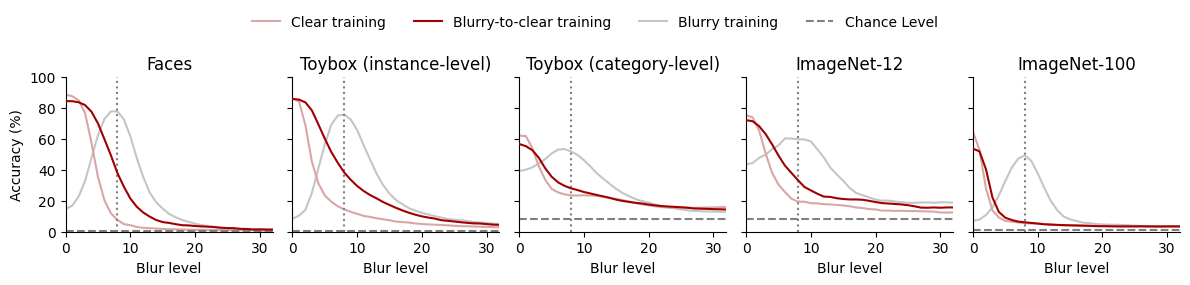

In [3]:
from scipy.interpolate import make_interp_spline, UnivariateSpline
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(12, 2.5), sharey=True)

handles = []
labels = []

for i, ax in enumerate(axes):

    line1, = ax.plot(blur_sigmas, clear_accuracies[i], label="Clear Model", linestyle="-", color='#d8a6a6', zorder=2)
    line2, = ax.plot(blur_sigmas, blur_accuracies[i], label="Blur Model", linestyle="-", color='#a00000', zorder=3)
    line3, = ax.plot(blur_sigmas, full_blur_accuracies[i], label="Full Blur Model", linestyle="-", color='#c5c5c5', zorder=1)

    # Scatter original data points
    #ax.scatter(blur_sigmas, clear_accuracies[i], color='#d8a6a6', marker="o", s=15)
    #ax.scatter(blur_sigmas, blur_accuracies[i], color='#a00000', marker="o", s=15)
    #ax.scatter(blur_sigmas, full_blur_accuracies[i], color='#c5c5c5', marker="o", s=15)

    line4 = ax.axhline(y=chance_levels[i], color="gray", linestyle="dashed", label="Chance Level")

    if i == 0:
        line5 = ax.axvline(x=8, color="gray", linestyle="dotted", label="Blur Level 8")
    else:
        ax.axvline(x=8, color="gray", linestyle="dotted")

    if i == 0:
        handles.extend([line1, line2, line3, line4])
        labels.extend(["Clear training", "Blurry-to-clear training", "Blurry training", "Chance Level"])

    ax.set_title(datasets[i])
    ax.set_xlabel("Blur level")
    ax.set_ylim(0, 100)
    ax.set_xlim(0,32)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].set_ylabel("Accuracy (%)")
fig.legend(handles, labels, loc="upper center", ncol=4, fontsize=10, frameon=False, bbox_to_anchor=(0.5, 1.15))
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.tight_layout()
plt.show()